In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
data = pd.read_csv('../data/updated_dataset_cor.csv')
data.head()

,id,location name,lat,lon,experience,Unnamed: 5,police_station_nearby,is_crowdy,crime_records_severe,safety_level
0,1,Peshwe Udyan Zoo,18.503622,73.851932,Scenic and tranquil,NaN,False,True,False,3
1,2,Shinde Chhatri,18.491631,73.897270,Very spiritual and peaceful,NaN,False,True,False,1
2,3,Rajiv Gandhi Zoological Park,18.452488,73.860802,Developing area,NaN,True,True,False,3
3,4,Empress Garden,49.149236,-123.136103,Rich historical significance,NaN,True,False,True,3
4,5,Saras Baug,19.044267,72.914934,Amazing variety of animals,NaN,False,False,False,2


In [18]:
# data_cleaned = data.dropna()
# print(data_cleaned.head())

Empty DataFrame
Columns: [id, location name, lat, lon, experience, Unnamed: 5, police_station_nearby, is_crowdy, crime_records_severe, safety_level]
Index: []


In [28]:
# Ensure the required columns exist before encoding
if 'location name' in data.columns and 'experience' in data.columns:
    data['location_name_encoded'] = label_encoder.fit_transform(data['location name'])
    data['experience_encoded'] = label_encoder.fit_transform(data['experience'])
    print("done")
    print(data.head())
else:
    print("Error: Required columns 'location name' or 'experience' are missing in the dataset.")

done
   id                 location name        lat         lon  \
0   1              Peshwe Udyan Zoo  18.503622   73.851932   
1   2                Shinde Chhatri  18.491631   73.897270   
2   3  Rajiv Gandhi Zoological Park  18.452488   73.860802   
3   4                Empress Garden  49.149236 -123.136103   
4   5                    Saras Baug  19.044267   72.914934   

                     experience  Unnamed: 5  police_station_nearby  is_crowdy  \
0           Scenic and tranquil         NaN                  False       True   
1   Very spiritual and peaceful         NaN                  False       True   
2               Developing area         NaN                   True       True   
3  Rich historical significance         NaN                   True      False   
4    Amazing variety of animals         NaN                  False      False   

   crime_records_severe  safety_level  location_name_encoded  \
0                 False             3                     33   
1      

In [30]:
X = data[['location_name_encoded', 'lat', 'lon', 'experience_encoded', 'police_station_nearby', 'is_crowdy', 'crime_records_severe']]
y = data['safety_level']

X

,location_name_encoded,lat,lon,experience_encoded,police_station_nearby,is_crowdy,crime_records_severe
0,33,18.503622,73.851932,11,False,True,False
1,41,18.491631,73.897270,13,False,True,False
2,37,18.452488,73.860802,3,True,True,False
3,12,49.149236,-123.136103,9,True,False,True
4,39,19.044267,72.914934,0,False,False,False
...,...,...,...,...,...,...,...
1995,4,18.520954,73.778087,3,True,True,True
1996,20,18.551276,73.941658,2,False,False,True
1997,48,17.446757,78.483820,14,False,False,True
1998,51,18.565632,73.886576,2,True,False,True


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 21.25%


In [34]:
res = model.predict(X_test)
res

array([1, 1, 5, 5, 2, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5,
       5, 1, 3, 1, 1, 1, 2, 1, 1, 5, 5, 5, 3, 1, 5, 5, 5, 5, 1, 1, 1, 1,
       5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 5, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 5, 1, 1, 5, 1,
       1, 1, 2, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 4, 1, 1, 1, 2, 1, 3, 1, 5, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       2, 1, 5, 1, 1, 1, 1, 5, 5, 1, 2, 1, 5, 5, 5, 1, 1, 1, 1, 1, 2, 1,
       2, 5, 2, 5, 1, 5, 1, 2, 5, 5, 1, 2, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5,
       1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 2, 1, 5,
       1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 5, 1, 5,
       2, 1, 1, 5, 5, 5, 5, 1, 4, 5, 1, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1,
       5, 2, 1, 1, 2, 1, 5, 5, 1, 5, 4, 5, 1, 5, 5, 1, 1, 1, 5, 1, 5, 2,
       4, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 2, 5, 2, 1, 1, 1, 1,
       5, 1, 5, 1, 1, 5, 2, 1, 1, 1, 1, 1, 5, 5, 1,

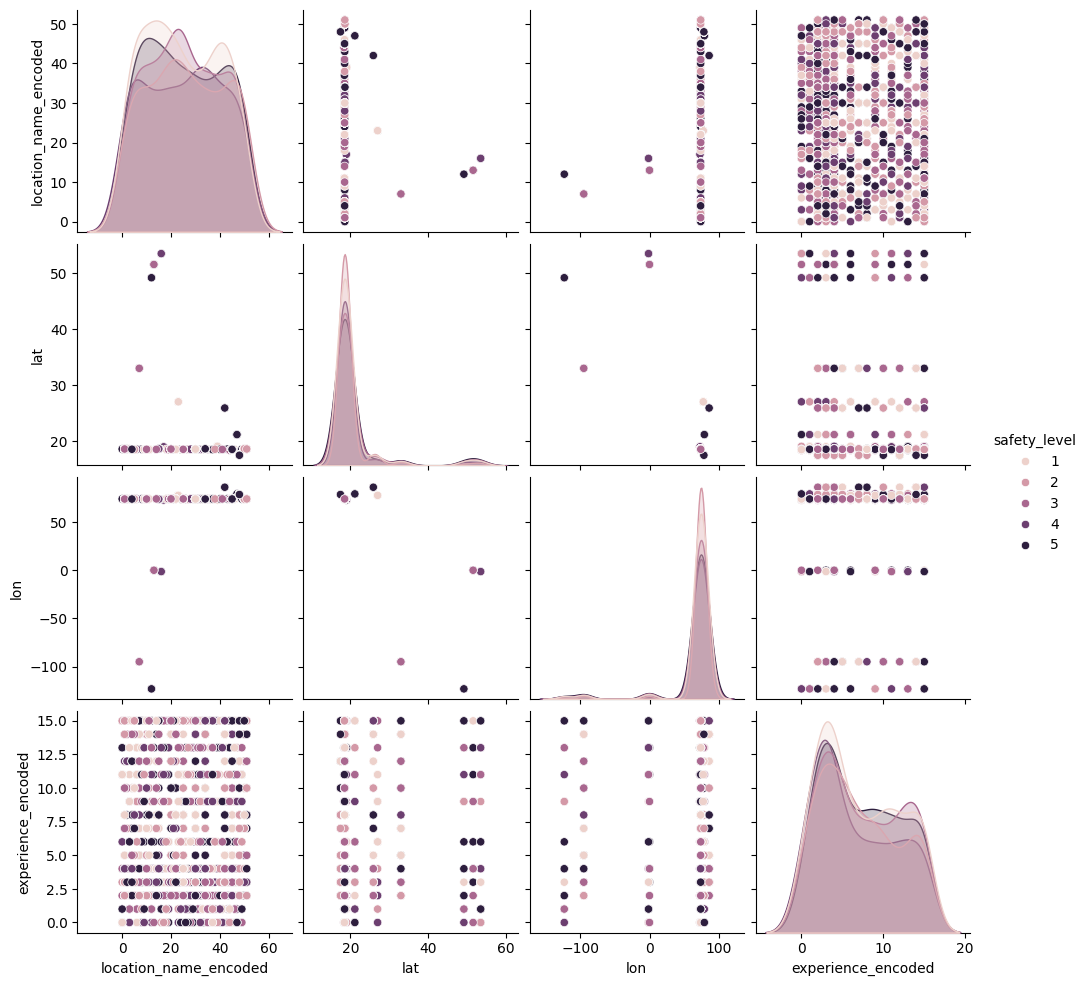

In [36]:
# Visualize the relationship between features and target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target for visualization
data_visualization = data[['location_name_encoded', 'lat', 'lon', 'experience_encoded', 'safety_level']]

# Pairplot to show relationships
sns.pairplot(data_visualization, hue='safety_level', diag_kind='kde')
plt.show()

In [37]:
# Compare predicted results with actual values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': res})
print(comparison_df.head())

# Calculate and display the number of correct predictions
correct_predictions = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
total_predictions = len(comparison_df)
print(f'Correct Predictions: {correct_predictions}/{total_predictions}')

   Actual  Predicted
0       3          1
1       3          1
2       2          5
3       3          5
4       5          2
Correct Predictions: 85/400


In [38]:
# Improve model accuracy
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}')

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test data
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy with Best Parameters: {test_accuracy * 100:.2f}%')

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.22
Test Accuracy with Best Parameters: 21.00%


In [39]:
# Try a different algorithm: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Test Accuracy: 18.00%


In [40]:
# Save the trained model and scaler for use in the app
import joblib
joblib.dump(rf_model, '../data/model_to_export.pkl')

joblib.dump(scaler, '../data/scaler.pkl')

print('Model and scaler saved successfully!')

Model and scaler saved successfully!


In [ ]:
# Export the trained model and scaler as JSON
import json

# Convert model parameters to JSON serializable format
rf_model_params = rf_model.get_params()
scaler_params = {
    'mean_': scaler.mean_.tolist(),
    'scale_': scaler.scale_.tolist()
}

# Save model and scaler parameters to JSON files
with open('../data/rf_model.json', 'w') as model_file:
    json.dump(rf_model_params, model_file)

with open('../data/scaler.json', 'w') as scaler_file:
    json.dump(scaler_params, scaler_file)

print('Model and scaler exported as JSON successfully!')

Model and scaler exported as JSON successfully!
